In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
from tqdm import tqdm

In [2]:
img = plt.imread('iith_logo.png')
img.shape

(300, 300, 3)

In [3]:
img = cv2.resize(img,(300,300))

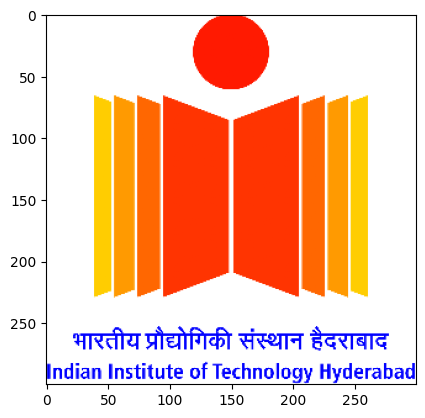

In [4]:
plt.imshow(img)

In [5]:
img.shape

(300, 300, 3)

### Q1

In [6]:
class conv3D:
    def __init__(self,img,kernel=None,Padding=0,stride=1,nonLinearity = 'relu') -> None:
        '''
        img: input image
        Padding: padding size
        stride: stride of filter
        nonLinearity: ['sigmoid','tanh','relu','leakyrelu']
        '''
        
        self.nl = nonLinearity
        self.nonLinDict = {'sigmoid':self.sigmoid,
                           'tanh':self.tanh,
                           'relu':self.relu,
                           'leakyrelu':self.leaky_relu}

        
        self.input = img
        
        
        self.c = self.input.shape[2]
        self.stride = stride
        
        if kernel is not None and kernel.any():
            print(kernel)
            self.kernel = kernel
            
            
        else:
            self.kernel = np.ones((11,11,3))


        if Padding:
            self.paddingSize = Padding
        else:
            self.paddingSize = 0


        self.outwidth = ((img.shape[0] - self.kernel.shape[0]+ 2*self.paddingSize) //(self.stride))+1
        self.outheight = ((img.shape[1] - self.kernel.shape[1]+ 2*self.paddingSize) //(self.stride))+1
        print(self.outwidth,self.outheight)

    def Conv2D(self,img,kernel):
        
        w = img.shape[0]
        h = img.shape[1]
        
        withPadding = np.zeros((w+2*self.paddingSize,h+2*self.paddingSize))
        output = np.zeros((self.outheight,self.outwidth))

        withPadding[self.paddingSize:w+self.paddingSize,self.paddingSize:h+self.paddingSize] = img
        withPadding = withPadding.astype(np.uint8)
        

        kernelShift = kernel.shape[0]//2



        if self.paddingSize>kernelShift:
            start = self.paddingSize
            end = self.paddingSize 
        else:
            start = kernelShift
            end = (-kernelShift)
        
        stride = self.stride
        print(kernel)

        print(f'Start: {start}, End: {end}')
        for i in range(start,w+end,stride):
            for j in range(start,h+end,stride):
                if i//stride <self.outwidth and j//stride <self.outheight:
                    toConvolve = withPadding[i-kernelShift:i+kernelShift+1,j-kernelShift:j+kernelShift+1]
                    retVal = toConvolve*kernel
                    output[i//stride,j//stride] = np.mean(retVal)

        print(output.shape)
        return output
            
    def process(self):
        temp = np.zeros((self.outheight,self.outwidth))

        for i in tqdm(range(self.c)):
            temp += self.Conv2D(self.input[:,:,i],self.kernel[:,:,i])

        self.out = temp/self.c
        self.out = self.nonLinDict[self.nl](self.out)
        return self.out

    def reLu(self,img):
        return np.max(0,img)
    
    def display(self):
        
        fig = plt.figure(figsize=(10, 10)) 
        
        fig.add_subplot(1, 3, 1) 
        plt.title("Input")
        plt.imshow(self.input, )

        fig.add_subplot(1, 3, 2) 
        plt.title("Kernel Input")
        plt.imshow(np.abs(self.kernel) * 100, )

        fig.add_subplot(1, 3, 3) 
        plt.title("Output")
        plt.imshow(self.out, )

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def tanh(self,x):
        return np.tanh(x)

    def relu(self,x):
        return np.maximum(0, x)

    def leaky_relu(self,x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)

In [7]:
customKernel = np.array([[[-1,0,1],
                         [-1,0,1],
                         [-1,0,1]],

                        [[-1,0,1],
                         [-1,0,1],
                         [-1,0,1]],
                         
                        [[-1,0,1],[-1,0,1],[-1,0,1]]],np.int8)

In [8]:
c3d = conv3D(img,kernel=customKernel,Padding=0,stride=2,nonLinearity='relu')

[[[-1  0  1]
  [-1  0  1]
  [-1  0  1]]

 [[-1  0  1]
  [-1  0  1]
  [-1  0  1]]

 [[-1  0  1]
  [-1  0  1]
  [-1  0  1]]]
149 149


 33%|███▎      | 1/3 [00:00<00:00,  9.53it/s]

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]
Start: 1, End: -1
(149, 149)
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Start: 1, End: -1
(149, 149)

100%|██████████| 3/3 [00:00<00:00,  9.60it/s]


[[1 1 1]
 [1 1 1]
 [1 1 1]]
Start: 1, End: -1
(149, 149)


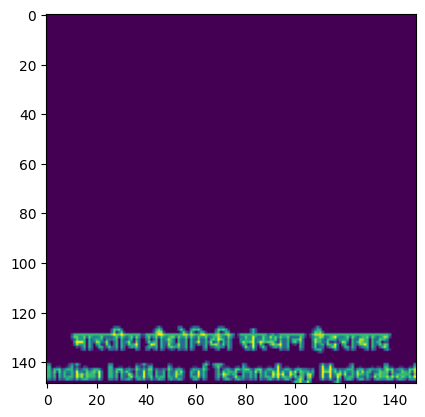

In [9]:
plt.imshow(c3d.process())

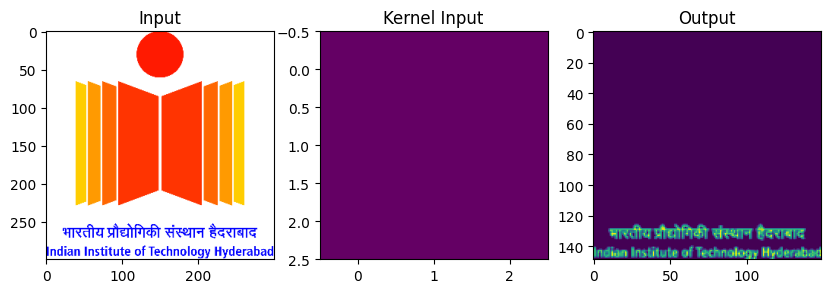

In [10]:
c3d.display()

### Q3

In [11]:
class conv3D_v2:
    def __init__(self,img,numFilters=1,filerSize = 3,Padding=0,stride=1,nonLinearity='relu') -> None:

        '''
        img: input image
        numFilters: number of filters
        filterSize: size of each filter
        Padding: padding size
        stride: stride of filter
        nonLinearity: ['sigmoid','tanh','relu','leakyrelu']
        '''
        
        self.nl = nonLinearity
        self.nonLinDict = {'sigmoid':self.sigmoid,
                           'tanh':self.tanh,
                           'relu':self.relu,
                           'leakyrelu':self.leaky_relu}

        self.input = img
        
        
        self.c = self.input.shape[2]
        self.stride = stride
        
        self.numFilters = numFilters
        self.filerSize = filerSize

        
     
        self.filters = np.random.rand(filerSize,filerSize,self.c,numFilters)
        self.filters = (self.filters*255).astype(np.int8)

            

        if Padding:
            self.paddingSize = Padding
        else:
            self.paddingSize = 0


        self.outwidth = ((img.shape[0] - self.filerSize+ 2*self.paddingSize) //(self.stride))+1
        self.outheight = ((img.shape[1] - self.filerSize+ 2*self.paddingSize) //(self.stride))+1
        print(self.outwidth,self.outheight)

    def Conv2D(self,img,kernel):
        
        w = img.shape[0]
        h = img.shape[1]
        
        withPadding = np.zeros((w+2*self.paddingSize,h+2*self.paddingSize))
        output = np.zeros((self.outheight,self.outwidth))

        withPadding[self.paddingSize:w+self.paddingSize,self.paddingSize:h+self.paddingSize] = img
        withPadding = withPadding.astype(np.uint8)
        

        kernelShift = kernel.shape[0]//2



        if self.paddingSize>kernelShift:
            start = self.paddingSize
            end = self.paddingSize 
        else:
            start = kernelShift
            end = (-kernelShift)
        
        stride = self.stride


        # print(f'Start: {start}, End: {end}')
        for i in range(start,w+end,stride):
            for j in range(start,h+end,stride):
                if i//stride <self.outwidth and j//stride <self.outheight:
                    toConvolve = withPadding[i-kernelShift:i+kernelShift+1,j-kernelShift:j+kernelShift+1]
                    retVal = toConvolve*kernel
                    output[i//stride,j//stride] = np.mean(retVal)
        # output = output[self.paddingSize:w+self.paddingSize,self.paddingSize:h+self.paddingSize]
        # print(output.shape)
        return output
            
    def process(self):
        self.out = np.zeros((self.outheight,self.outwidth,self.numFilters))
        # print(self.out.shape)


        for j in tqdm(range(self.numFilters)):
            curr = np.zeros((self.outheight,self.outwidth))

            for i in range(self.c):
                curr += self.Conv2D(self.input[:,:,i],self.filters[:,:,i,j])
            curr/=self.c
            self.out[:,:,j] =    self.nonLinDict[self.nl](curr)

        return self.out




    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def tanh(self,x):
        return np.tanh(x)

    def relu(self,x):
        return np.maximum(0, x)

    def leaky_relu(self,x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)
    
    def display(self,code=1):
        '''
        code = 1-> display activation maps, 2-> display kernels used, 3-> display input
        '''
        if code == 1:
            fig = plt.figure(figsize=(20, 20)) 
            if self.numFilters ==1:
                plt.title("activation maps")
                plt.imshow(self.out, )

            for i in range(1,self.numFilters):
                fig.add_subplot(3, math.ceil(self.numFilters/2), i) 
                plt.title("activation maps")
                plt.imshow(self.out.transpose(2,0,1)[i-1], )
            

        if code ==2:
            # print(self.filters)
            fig = plt.figure(figsize=(20, 20)) 
            for i in range(1,self.numFilters+1):
                fig.add_subplot(3, math.ceil(self.numFilters/2), i) 
                plt.title("kernels used")
                plt.imshow(self.filters[:,:,:,i-1], )
        if code ==3:
            if len(self.input.shape) ==4:
                fig = plt.figure(figsize=(20, 20)) 
                for i in range(1,self.numFilters+1):
                    fig.add_subplot(3, math.ceil(self.numFilters/2), i) 
                    plt.title("kernels used")
                    plt.imshow(self.input[:,:,:,i-1], )
            else:
                plt.imshow(self.input, )

In [12]:
c3d = conv3D_v2(img,numFilters=5,filerSize = 3,Padding=0,stride=1,nonLinearity='relu')

output = c3d.process()

298 298


100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


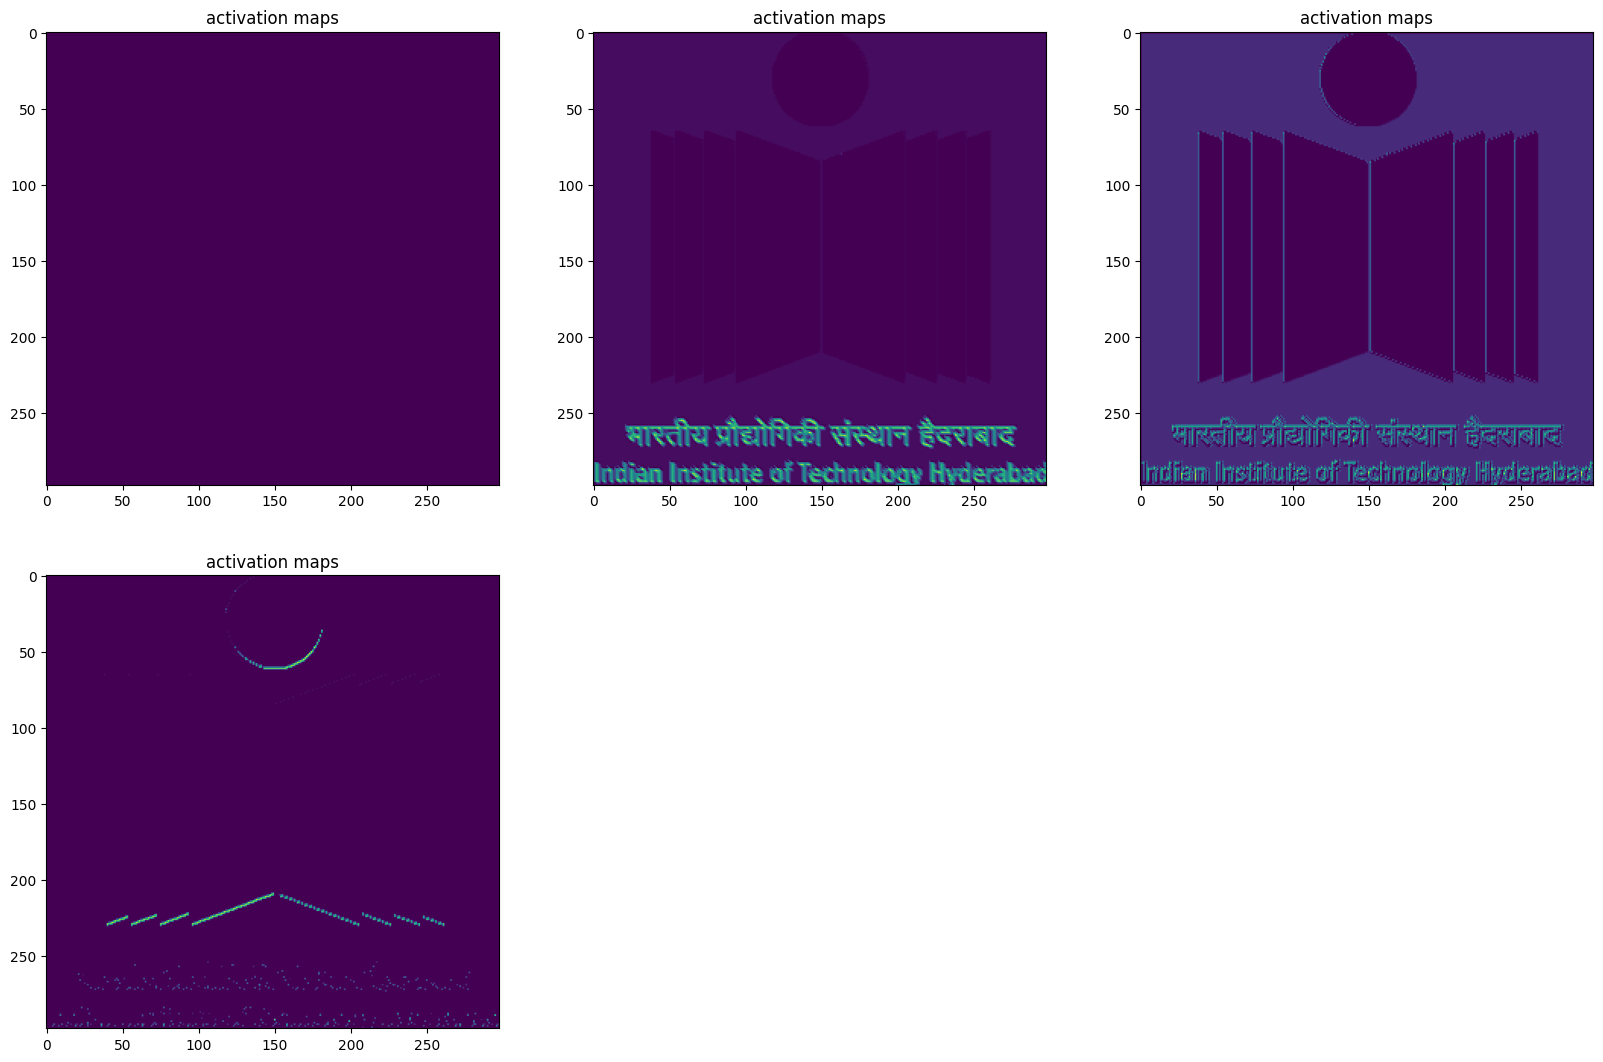

In [13]:
c3d.display(code=1)

### Pooling Q2, Q4

In [14]:
class Pool:
    def __init__(self,img,filerSize = 3,Padding=0,stride=1,poolType='max') -> None:

        '''
        img: input image
        numFilters: number of filters
        filterSize: size of each filter
        Padding: padding size
        stride: stride of filter
        nonLinearity: ['max','min','avg','gap']
        '''
        
        self.pt = poolType
        self.poolTypeDict = {'max':self.maxPool,
                           'min':self.minPool,
                           'avg':self.avgPool,}

        self.input = img
        
        
        self.c = self.input.shape[2]
        self.stride = stride
        
        # self.numFilters = numFilters
        self.filerSize = filerSize

        self.filters = np.random.rand(filerSize,filerSize,self.c)
        self.filters = (self.filters*255).astype(np.int8)

        print(f'Filter Shape: {self.filters.shape}')

        if Padding:
            self.paddingSize = Padding
        else:
            self.paddingSize = 0


        self.outwidth = ((img.shape[0] - self.filerSize+ 2*self.paddingSize) //(self.stride))+1
        self.outheight = ((img.shape[1] - self.filerSize+ 2*self.paddingSize) //(self.stride))+1
        print(self.outwidth,self.outheight)

    def Conv2D(self,img,kernel):
        
        w = img.shape[0]
        h = img.shape[1]
        
        withPadding = np.zeros((w+2*self.paddingSize,h+2*self.paddingSize))
        output = np.zeros((self.outheight,self.outwidth))

        withPadding[self.paddingSize:w+self.paddingSize,self.paddingSize:h+self.paddingSize] = img
        withPadding = withPadding.astype(np.uint8)
        

        kernelShift = kernel.shape[0]//2



        if self.paddingSize>kernelShift:
            start = self.paddingSize
            end = self.paddingSize 
        else:
            start = kernelShift
            end = (-kernelShift)
        
        stride = self.stride


        # print(f'Start: {start}, End: {end}')
        for i in range(start,w+end,stride):
            for j in range(start,h+end,stride):
                if i//stride <self.outwidth and j//stride <self.outheight:
                    toConvolve = withPadding[i-kernelShift:i+kernelShift+1,j-kernelShift:j+kernelShift+1]
                    # retVal = toConvolve*kernel
                    output[i//stride,j//stride] = self.poolTypeDict[self.pt](toConvolve)
        
        # print(output.shape)
        return output
            
    def process(self):
        if not self.pt == 'gap':

            self.out = np.zeros((self.outheight,self.outwidth,self.c))

            for i in range(self.c):
                self.out[:,:,i] = self.Conv2D(self.input[:,:,i],self.filters[:,:,i])
            return self.out
        else:
            self.out = np.zeros((self.c))
            for i in range(self.c):
                self.out[i] = np.mean(self.input[:,:,i])
            return self.out


    def display(self):
        if not self.pt == 'gap':

            fig = plt.figure(figsize=(10, 10)) 
            
            for i in range(1,self.out.shape[2]+2):
                if i ==1:
                    
                    fig.add_subplot(5, 2, i) 
                    plt.imshow(self.input, )
                    plt.title(f"Input")
                else:
                    fig.add_subplot(5, 2, i) 
                    plt.title(f"Pooling Map {i-1}")
                    plt.imshow(self.out.transpose(2,0,1)[i-2], )
        else:
            print('Displaying Input')


    def maxPool(self,x):
        return np.max(x)

    def minPool(self,x):
        return np.min(x)

    def avgPool(self,x):
        return np.mean(x)



In [15]:
pool = Pool(img,filerSize = 2,Padding=0,stride=2,poolType='min')

Filter Shape: (2, 2, 3)
150 150


In [16]:
retPoolMap = pool.process()

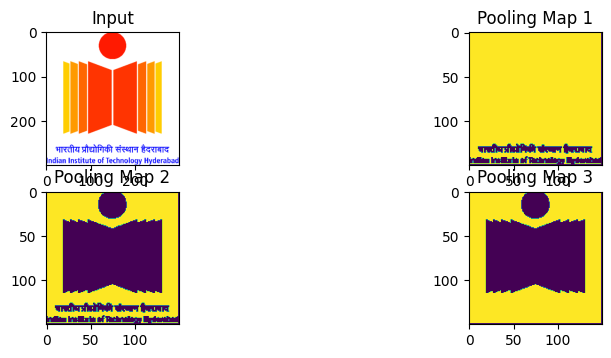

In [17]:
pool.display()

### MLP Q5

In [18]:
class MLP:
    def __init__(self,inputSize,hidden=[],nonLin = [],outSize=1,useLogits=True) -> None:
        self.inputSize = inputSize
        self.hidden = hidden
        self.nonLin = nonLin
        self.outSize = outSize
        self.useLogits = useLogits

        self.nonLinDict = {'sigmoid':self.sigmoid,
                           'tanh':self.tanh,
                           'relu':self.relu,
                           'leakyrelu':self.leaky_relu}

    def createMLP(self):
        self.weights = []

        if len(self.hidden) == 1:
            self.weights.append(np.random.rand(self.inputSize,self.hidden[0]))

        for i in range(len(self.hidden)-1):
            if i == 0:
                self.weights.append(np.random.rand(self.inputSize,self.hidden[i]))
            self.weights.append(np.random.rand(self.hidden[i],self.hidden[i+1]))

        self.weights.append(np.random.rand(self.hidden[-1],self.outSize))
        
        for i in self.weights:
            print(i.shape)
    
    def softmax(self,x):
        num = np.exp(x-np.max(x))
        return num/num.sum()

    def fwd(self,input):
        curr = None
        for i in range(len(self.hidden)):
            try:
                print(curr.shape,self.weights[i].shape)
            except:
                pass
            if i ==0:
                
                curr = self.nonLinDict[self.nonLin[i]](np.dot(input,self.weights[i]))
                
            if i>1:
                curr = self.nonLinDict[self.nonLin[i]](np.dot(curr,self.weights[i]))

        out = np.dot(curr,self.weights[-1])
        if self.useLogits:
            return out
        else:
            return self.softmax(out)

    


    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def tanh(self,x):
        return np.tanh(x)

    def relu(self,x):
        return np.maximum(0, x)

    def leaky_relu(self,x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)

In [19]:
inputx = np.array([-11,-2,-23,1,3,2,3,])
hidden = [128,128]
nonLin = ['relu','relu']

mlp1 = MLP(inputSize=7,hidden=hidden,nonLin = nonLin,outSize=10,useLogits=False)
mlp1.createMLP()


(7, 128)
(128, 128)
(128, 10)


In [20]:
mlp1.fwd(inputx)

(128,) (128, 128)


array([0.06883242, 0.10354198, 0.07412756, 0.11114944, 0.07366018,
       0.0747776 , 0.12213666, 0.16092025, 0.10407798, 0.10677592])

### CNN Q6

In [21]:
class CNN:
    def __init__(self,img):
        self.img = img
    def fwd(self):
        
        print('==============================')
        print('Conv1...')
        print(f'Input Shape: {self.img.shape}')
        conv1 = conv3D_v2(self.img,numFilters=16,filerSize = 5,Padding=0,stride=1,nonLinearity='relu')
        o1 = conv1.process()
        print(f'Output Shape: {o1.shape}')
        print('==============================')
        
        print('Pool1...')
        print(f'Input Shape: {o1.shape}')
        pool1 = Pool(o1,filerSize = 2,Padding=0,stride=2,poolType='max')
        p1 = pool1.process()
        print(f'Output Shape: {p1.shape}')
        print('==============================')
        
        print('Conv2...')
        print(f'Input Shape: {p1.shape}')
        conv2 = conv3D_v2(p1,numFilters=32,filerSize = 5,Padding=0,stride=1,nonLinearity='sigmoid')
        c2 = conv2.process()
        print(f'Output Shape: {c2.shape}')
        print('==============================')

        print('Pool2...')
        print(f'Input Shape: {c2.shape}')
        pool2 = Pool(c2,filerSize = 2,Padding=0,stride=2,poolType='max')
        p2 = pool2.process()
        print(f'Output Shape: {p2.shape}')
        print('==============================')

        print('GAP...')
        print(f'Input Shape: {p2.shape}')
        gap1 = Pool(p2,filerSize = 2,Padding=0,stride=2,poolType='gap')
        g1 = gap1.process()
        print(f'Output Shape: {g1.shape}')
        print('==============================')

        ipsize= g1.shape[0]

        mlp1 = MLP(inputSize=ipsize,hidden=[ipsize],nonLin = ['relu'],outSize=1000,useLogits=False)
        mlp1.createMLP()
        output = mlp1.fwd(g1)
        print(f"Output Class is: {np.argmax(output)}")

        return output


In [22]:
cnn1 = CNN(img=cv2.resize(img,(224,224)))
output = cnn1.fwd()

Conv1...
Input Shape: (224, 224, 3)
220 220


100%|██████████| 16/16 [00:08<00:00,  1.86it/s]


Output Shape: (220, 220, 16)
Pool1...
Input Shape: (220, 220, 16)
Filter Shape: (2, 2, 16)
110 110
Output Shape: (110, 110, 16)
Conv2...
Input Shape: (110, 110, 16)
106 106


100%|██████████| 32/32 [00:20<00:00,  1.58it/s]

Output Shape: (106, 106, 32)
Pool2...
Input Shape: (106, 106, 32)
Filter Shape: (2, 2, 32)
53 53
Output Shape: (53, 53, 32)
GAP...
Input Shape: (53, 53, 32)
Filter Shape: (2, 2, 32)
26 26
Output Shape: (32,)
(32, 32)
(32, 1000)
Output Class is: 151


In [23]:
print(f'Input Shape: {cv2.resize(img,(224,224)).shape}, Output Shape: {output.shape}')

Input Shape: (224, 224, 3), Output Shape: (1000,)
